In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

None
              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                  

Numerical Features (6): ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Features (8): ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']




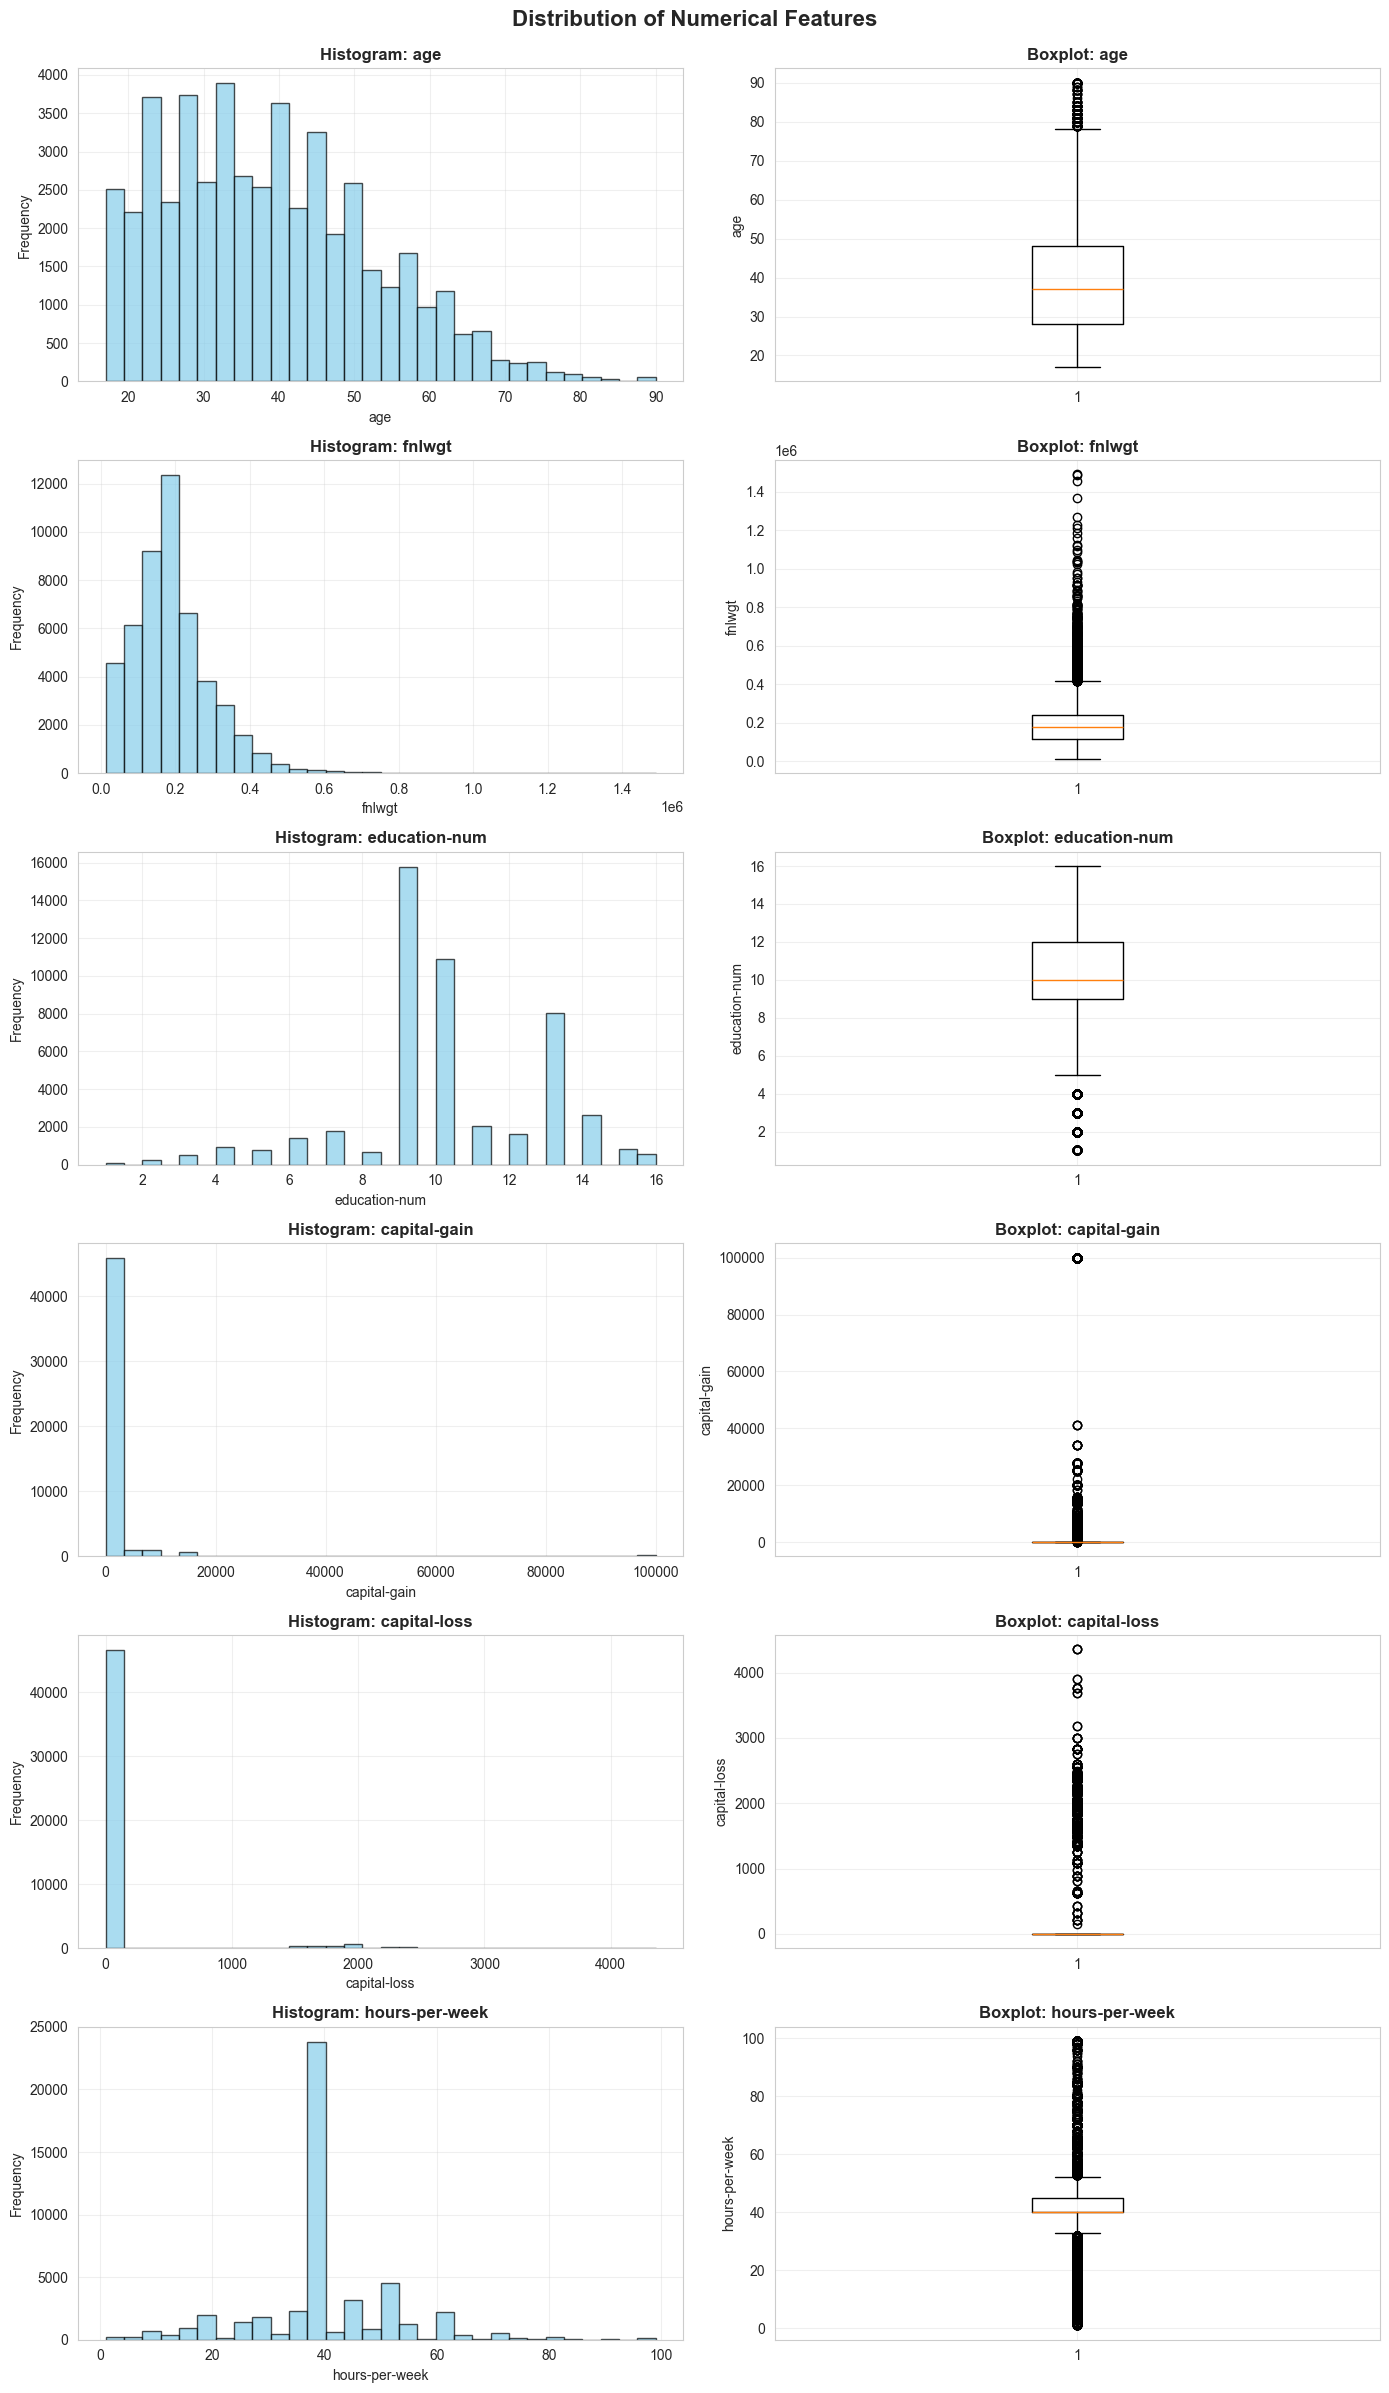

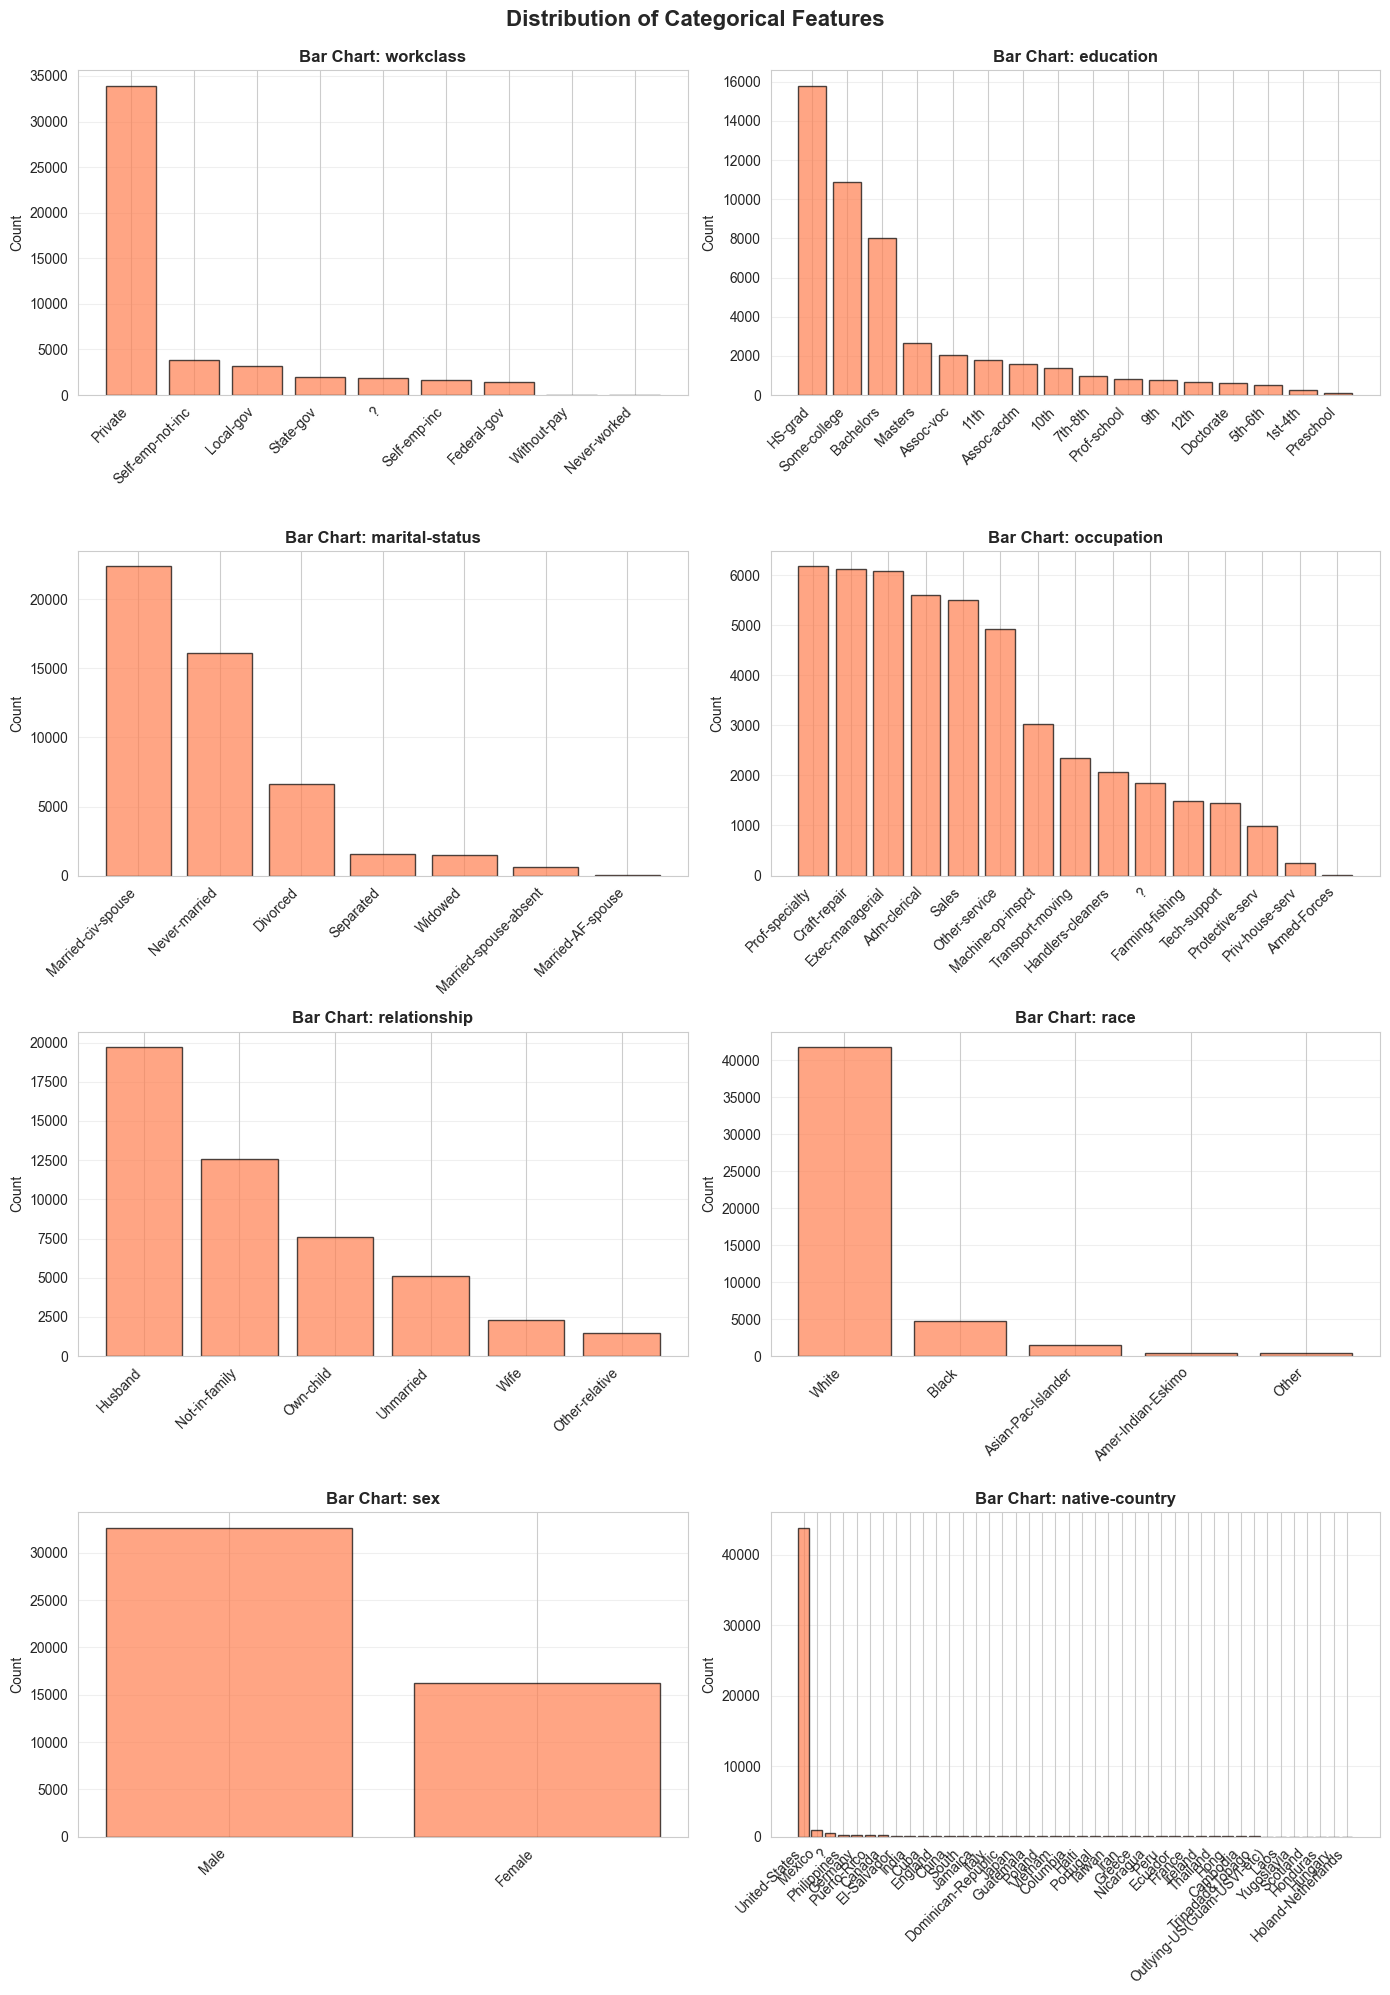


Summary Statistics for Numerical Features:
            age      fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.00    48842.00       48842.00      48842.00       48842.0   
mean      38.64   189664.13          10.08       1079.07          87.5   
std       13.71   105604.03           2.57       7452.02         403.0   
min       17.00    12285.00           1.00          0.00           0.0   
25%       28.00   117550.50           9.00          0.00           0.0   
50%       37.00   178144.50          10.00          0.00           0.0   
75%       48.00   237642.00          12.00          0.00           0.0   
max       90.00  1490400.00          16.00      99999.00        4356.0   

       hours-per-week  
count        48842.00  
mean            40.42  
std             12.39  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00  


Frequency Distribution for Categorical Features:

workclass:
workclass


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 12)

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print(f"Numerical Features ({len(numerical_features)}): {list(numerical_features)}")
print(f"Categorical Features ({len(categorical_features)}): {list(categorical_features)}")
print("\n" + "="*80 + "\n")

# ===== NUMERICAL FEATURES: HISTOGRAMS AND BOXPLOTS =====
if len(numerical_features) > 0:
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 4*len(numerical_features)))
    if len(numerical_features) == 1:
        axes = axes.reshape(1, -1)
    
    fig.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold', y=0.995)
    
    for idx, feature in enumerate(numerical_features):
        # Histogram
        axes[idx, 0].hist(X[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f"Histogram: {feature}", fontweight='bold')
        axes[idx, 0].set_xlabel(feature)
        axes[idx, 0].set_ylabel("Frequency")
        axes[idx, 0].grid(alpha=0.3)
        
        # Boxplot
        axes[idx, 1].boxplot(X[feature].dropna(), vert=True)
        axes[idx, 1].set_title(f"Boxplot: {feature}", fontweight='bold')
        axes[idx, 1].set_ylabel(feature)
        axes[idx, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ===== CATEGORICAL FEATURES: BAR CHARTS =====
if len(categorical_features) > 0:
    num_cols = 2
    num_rows = (len(categorical_features) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5*num_rows))
    if num_rows == 1 and num_cols == 1:
        axes = np.array([[axes]])
    elif num_rows == 1 or num_cols == 1:
        axes = axes.reshape(num_rows, num_cols)
    
    fig.suptitle("Distribution of Categorical Features", fontsize=16, fontweight='bold', y=0.995)
    
    for idx, feature in enumerate(categorical_features):
        row = idx // num_cols
        col = idx % num_cols
        
        # Count plot
        value_counts = X[feature].value_counts()
        axes[row, col].bar(range(len(value_counts)), value_counts.values, color='coral', edgecolor='black', alpha=0.7)
        axes[row, col].set_xticks(range(len(value_counts)))
        axes[row, col].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[row, col].set_title(f"Bar Chart: {feature}", fontweight='bold')
        axes[row, col].set_ylabel("Count")
        axes[row, col].grid(alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(categorical_features), num_rows * num_cols):
        row = idx // num_cols
        col = idx % num_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# ===== SUMMARY STATISTICS TABLE =====
print("\nSummary Statistics for Numerical Features:")
print("="*80)
summary_stats = X[numerical_features].describe().round(2)
print(summary_stats)

print("\n\nFrequency Distribution for Categorical Features:")
print("="*80)
for feature in categorical_features:
    print(f"\n{feature}:")
    print(X[feature].value_counts())
    print(f"Missing values: {X[feature].isna().sum()}")